In this project we take a look at how asset class diversification impacts risk. 

We do this by comparing the variance-covariance VaR when holding the S&P500 index versus a diversified portfolio.

We then perform a stress test, using historical data from the Covid-19 stock market crash.

In [71]:
# Librairies
import numpy as np
import yfinance as yf
from scipy.stats import norm

In [72]:
# Building the portfolio
symbols = {"SPY", "TLT", "GLD"} # SPY : S&P500 ETF, TLT : 20+ Year Treasury Bond ETF, GLD : SPDR Gold Trust
weights = np.array([0.5, 0.3, 0.2]) 
portfolio_value = 1000000

In [73]:
# Downloading historical data
data = yf.download(symbols, start="2020-01-01", end="2025-01-01")["Close"]
returns = data.pct_change().dropna()

[*********************100%***********************]  3 of 3 completed


In [74]:
# Formula for the parametric Value at Risk (VaR)
def compute_parametric_var(returns_series, alpha=0.01):
    mean = returns_series.mean()
    std = returns_series.std()
    parametric_var = mean + std * norm.ppf(alpha)
    return abs(parametric_var) * 100


In [75]:
# Computing the VaR for S&P500 alone
spy_var = compute_parametric_var(returns["SPY"])
print(f"VaR for the S&P500 alone : {spy_var:.2f}%")

# Calcul pour le portefeuille
portfolio_returns = returns.dot(weights)
portfolio_var = compute_parametric_var(portfolio_returns)
print(f"VaR for the diversified portfolio : {portfolio_var:.2f}%")

# Calcul de la réduction du risque
reduction = (spy_var - portfolio_var) / spy_var * 100
print(f"\nRisk reduction from diversification : {reduction:.2f}%")

VaR for the S&P500 alone : 3.02%
VaR for the diversified portfolio : 1.67%

Risk reduction from diversification : 44.50%


Through diversifying asset classes, we reduce VaR by 44.5%.

Now we set-up a stress test by comparing how these VaR values compare during the Covid-19 market crash.

In [76]:
# Downloading data for february and march 2020
data_covid = yf.download(list(symbols), start="2020-02-01", end="2020-04-01")["Close"]
returns_covid = data_covid.pct_change().dropna()

[*********************100%***********************]  3 of 3 completed


In [77]:
# Covid-19 VaR computations
spy_covid_var = compute_parametric_var(returns_covid["SPY"])
portfolio_covid_returns = returns_covid.dot(weights)
portfolio_covid_var = compute_parametric_var(portfolio_covid_returns)

print("\nCovid-19 crash (Feb-Mar 2020):")
print(f"S&P500 VaR : {spy_covid_var:.2f}%")
print(f"Portfolio VaR : {portfolio_covid_var:.2f}%")

covid_reduction = (spy_covid_var - portfolio_covid_var) / spy_covid_var * 100
print(f"\nVaR reduction during the crisis : {covid_reduction:.2f}%")


Covid-19 crash (Feb-Mar 2020):
S&P500 VaR : 10.41%
Portfolio VaR : 3.92%

VaR reduction during the crisis : 62.31%


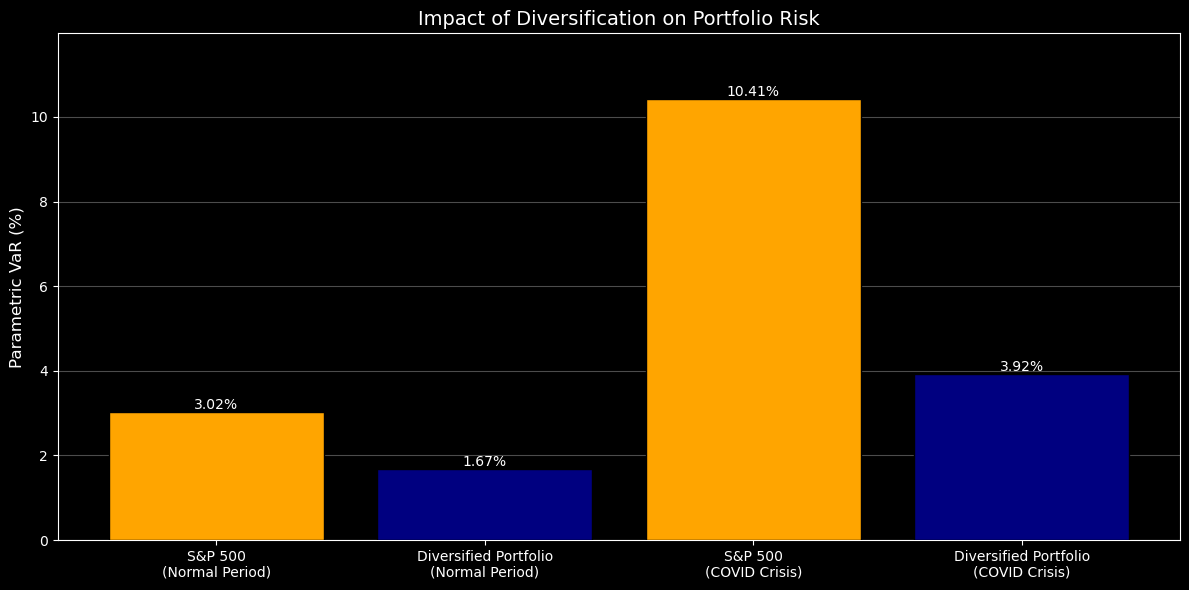

In [78]:
# Plot of different risk measures
plt.style.use('dark_background')
labels = ['S&P 500\n(Normal Period)', 'Diversified Portfolio\n(Normal Period)', 
         'S&P 500\n(COVID Crisis)', 'Diversified Portfolio\n(COVID Crisis)']
var_values = [spy_var, portfolio_var, spy_covid_var, portfolio_covid_var]
colors = ['orange', 'navy', 'orange', 'navy']

plt.figure(figsize=(12, 6))
bars = plt.bar(labels, var_values, color=colors, edgecolor='black', zorder=3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom')

plt.ylabel('Parametric VaR (%)', fontsize=12)
plt.title('Impact of Diversification on Portfolio Risk', fontsize=14)
plt.grid(axis='y', alpha=0.3, zorder=2)
plt.ylim(0, max(var_values)*1.15)
plt.tight_layout()
plt.show()

We have shown that asset class diversification is a major factor for lowering Value at Risk, especially during crises.